<a href="https://colab.research.google.com/github/raamav/Sentiment-Analysis-UserReviews/blob/master/IMDB_Reviews_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Reviews Using RNN

as covered in deeplearning.ai course

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
import tensorflow_datasets as tfds

In [0]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

In [0]:
import numpy as np

In [0]:
train_data, test_data = imdb['train'],imdb['test']

**IMP** The train and the test sets are iterables, each having 25,000 values of sentences and labels

In [0]:
# GETTING SENTENCES AND LABELS FOR TRAINING DATA

training_sentences = []
training_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [0]:
print(training_sentences[2])
print(training_labels[2])

b'Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do. <br /><br />But come on Hollywood - a Mountie telling the people of Dawson City, Yukon to elect themselves a marshal (yes a marshal!) and to enforce the law themselves, then gunfighters battling it out on the streets for control of the town? <br /><br />Nothing even remotely resembling that happened on the Canadian side of the border during the Klondike gold rush. Mr. Mann and company appear to have mistaken Dawson City for Deadwood, the Canadian North for the American Wild West.<br /><br />Canadian viewers be prepared for a Reefer Madness type of enjoyable howl with this ludicrous plot, or, to shake your head in disgust.'
0


In [0]:
# GETTING SENTENCES AND LABELS FOR TRAINING DATA

testing_sentences = []
testing_labels = []

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
print(testing_sentences[3])
print(testing_labels[3])

b'Poor Shirley MacLaine tries hard to lend some gravitas to this mawkish, gag-inducing "feel-good" movie, but she\'s trampled by the run-away sentimentality of a film that\'s not the least bit grounded in reality.<br /><br />This was directed by Curtis Hanson? Did he have a lobotomy since we last heard from him? Hanson can do effective drama sprinkled with comedy, as evidenced by "Wonder Boys." So I don\'t know what happened to him here. This is the kind of movie that doesn\'t want to accept that life is messy and fussy, and that neat, tidy endings (however implausible they might be) might make for a nice closing shot, but come across as utterly phony if the people watching the film have been through anything remotely like what the characters in the film go through.<br /><br />My wife and I made a game of calling out the plot points before they occurred -- e.g. "the old man\'s going to teach her to read and then drop dead." Bingo! This is one of those movies where the characters give l

In [0]:
print("type(training_sentences) :", type(training_sentences))
print(" \n type(training_labels) :", type(training_labels))

print(" \n shape of training_sentences :", len(training_sentences))
print(" \n shape of training_labels :", len(training_labels))

type(training_sentences) : <class 'list'>
 
 type(training_labels) : <class 'list'>
 
 shape of training_sentences : 25000
 
 shape of training_labels : 25000


**IMP** We have successfuly converted the predictors and the labels into lists

In [0]:
# COVERTING THE LABELS TO NUMPY ARRAYS

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
print(training_labels_final.shape)

(25000,)


In [0]:
# TOKENIZING THE CODE 
# THREE THINGS: ENCODE SEQUENCE AND PAD SEQUENCE. GET WORD_INDEX

vocab_index = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_index, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [0]:
print("length of the unfiltered vocabulary : ", len(word_index))

length of the unfiltered vocabulary :  86539


In [0]:
training_sequence = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(training_sequence, maxlen = max_length,padding = "post", truncating = trunc_type)


In [0]:
print("\n shape of training sequence", len(training_sequence))
print("\n shape of padding sequence", training_padded.shape)


 shape of training sequence 25000

 shape of padding sequence (25000, 120)


In [0]:
# IMPLEMENTING SEQUENCE ENCODING AND PADDING ON THE TESTING SET

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)

testing_padded = pad_sequences(testing_sequence, maxlen = max_length, padding = "post", truncating = trunc_type)

In [0]:
print("shape of testing padding sequence", testing_padded.shape)

shape of testing padding sequence (25000, 120)


**We now have the encoded and padded sentences (as numpy arrays) for both the training and test datasets.** 
**Additionally, the labels have been converted to numpy arrays**

## Dense Model with `Flatten` Layer()

**Summary**: 

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# CREATE A DENSE NEURAL NETWORK IN KERAS

vocab_size = vocab_index + 1   # NUMBER OF UNIQUE WORDS IN VOCAB = 10,000 + 1 
embedding_dimensions = embedding_dim # =16
sentence_length = max_length  # LENGTH OF EACH PADDED SENTENCE = 120

dense_model = keras.models.Sequential([
                                          
                  keras.layers.Embedding(input_dim = vocab_size,
                                         output_dim = embedding_dimensions,
                                         input_length = sentence_length),
                                          
                  keras.layers.Flatten(),

                  keras.layers.Dense(50, activation = "elu",kernel_initializer = 'he_normal'),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dropout(rate = 0.2),

                  keras.layers.Dense(30, activation = "elu",kernel_initializer = 'he_normal'),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dropout(rate = 0.1),



                  keras.layers.Dense(1, activation = "sigmoid")


])


dense_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
dense_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160016    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                96050     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                1

In [0]:
# IMPLEMENT CALLBACKS

checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_dense_best.h5",save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)


In [0]:
history = dense_model.fit(training_padded, training_labels_final, epochs = 20,
                          validation_data = (testing_padded, testing_labels_final),
                          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5435 - accuracy: 0.7074 - val_loss: 0.4145 - val_accuracy: 0.8080
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2745 - accuracy: 0.8861 - val_loss: 0.4686 - val_accuracy: 0.7945
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.1196 - accuracy: 0.9576 - val_loss: 0.6376 - val_accuracy: 0.7866
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0672 - accuracy: 0.9764 - val_loss: 0.8098 - val_accuracy: 0.7799
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0480 - accuracy: 0.9832 - val_loss: 0.8871 - val_accuracy: 0.7772
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0410 - accuracy: 0.9845 - val_loss: 0.9796 - val_accuracy: 0.7783


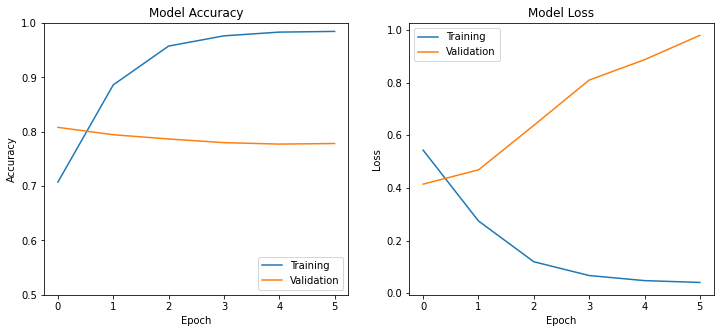

In [0]:
# BETTER LOOKING PLOTS FOR ACCURACY AND LOSS

import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_ylim([0.5,1])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='upper left')

In [0]:
# LOADING THE BEST MODEL
best_model = keras.models.load_model('imdb_dense_best.h5')

best_model.evaluate(testing_padded, testing_labels_final)

782/782 [==============================] - 2s 2ms/step - loss: 0.4145 - accuracy: 0.8080


[0.4144747853279114, 0.8080400228500366]

## Dense Model with `GlobalAveragePooling1D` layer

**SUMMARY** Slightly less number of parameters

In [0]:
# CLEAR BACKEND DATA

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


# CREATE A DENSE NEURAL NETWORK IN KERAS

vocab_size = vocab_index + 1   # NUMBER OF UNIQUE WORDS IN VOCAB = 10,000 + 1 
embedding_dimensions = 16
sentence_length = max_length  # LENGTH OF EACH PADDED SENTENCE = 120


dense_model_pooling = keras.models.Sequential([
                                          
                  keras.layers.Embedding(input_dim = vocab_size,
                                         output_dim = embedding_dimensions,
                                         input_length = sentence_length),
                                          
                  keras.layers.GlobalAveragePooling1D(),

                  keras.layers.Dense(6, activation = "relu"),
                  keras.layers.Dense(1, activation = "sigmoid")


])


# VIEW MODEL ARCHITECTURE
dense_model_pooling.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 160,125
Trainable params: 160,125
Non-trainable params: 0
_________________________________________________________________


In [0]:
# COMPILE AND FIT MODEL

dense_model_pooling.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

history = dense_model_pooling.fit(training_padded, training_labels_final, epochs = 10,
                          validation_data = (testing_padded, testing_labels_final))


Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5506 - accuracy: 0.7550 - val_loss: 0.4174 - val_accuracy: 0.8147
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3327 - accuracy: 0.8605 - val_loss: 0.3678 - val_accuracy: 0.8359
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2710 - accuracy: 0.8899 - val_loss: 0.3737 - val_accuracy: 0.8353
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2360 - accuracy: 0.9068 - val_loss: 0.3873 - val_accuracy: 0.8346
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2087 - accuracy: 0.9215 - val_loss: 0.4146 - val_accuracy: 0.8289
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1882 - accuracy: 0.9292 - val_loss: 0.4698 - val_accuracy: 0.8120
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1702 - accuracy: 0.9405 - val_loss: 0.4783 - val_accuracy: 0.8175
Epoch 

In [0]:
# GETTING WEIGHTS OF THE LAYERS
# VERY USEFUL TO GET A SENSE OF WHATS HAPPENING IN THE LAYERS


# EMBEDDING LAYER
a = dense_model.layers[0] 
weights = a.get_weights() 
print("\n weights[0].shape :",weights[0].shape) # Emb. layer has 16,016 param




 weights[0].shape : (10001, 16)


##### QUICK SUMMARY
The best I have got so far is 80%.

I'll be attempting the following THREE approaces to try and incease the accuracy ( **Target = 85%** )
1. Using Sequence Models (LSTMs/GRUs)
2. Using Pre-Trained Embeddings (GloVe - Global Vectors for Word Representation)
3. Using Text Preprocessing Techniques (e.g. Lemmatization, Stop Words etc)

<BR>

## LSTM Based Model 

In [0]:
# CLEAR BACKEND DATA

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


# CREATE A DENSE NEURAL NETWORK IN KERAS

vocab_size = vocab_index + 1   # NUMBER OF UNIQUE WORDS IN VOCAB = 10,000 + 1 
embedding_dimensions = 16
sentence_length = max_length  # LENGTH OF EACH PADDED SENTENCE = 120


lstm_model = keras.models.Sequential([
                                          
                  keras.layers.Embedding(input_dim = vocab_size,
                                         output_dim = embedding_dimensions,
                                         input_length = sentence_length),
                          
                  keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences= True)),
                  keras.layers.Bidirectional(keras.layers.LSTM(32)),

                  keras.layers.Dense(64, activation = "elu"),
                  keras.layers.Dropout(rate = 0.1),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dense(32, activation = "elu"),
                  keras.layers.Dropout(rate = 0.1),
                  keras.layers.BatchNormalization(),

                  keras.layers.Dense(1, activation = "sigmoid")
                  
])


# VIEW MODEL ARCHITECTURE
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160016    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [0]:
# IMPLEMENT CALLBACKS

checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_lstm_best.h5",save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)




# COMPILE AND FIT MODEL

lstm_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

history_2 = lstm_model.fit(training_padded, training_labels_final, epochs = 20,
                          validation_data = (testing_padded, testing_labels_final), 
                           callbacks = [checkpoint_cb, early_stopping_cb]
                           )


Epoch 1/20
782/782 [==============================] - 26s 33ms/step - loss: 0.4806 - accuracy: 0.7658 - val_loss: 0.5587 - val_accuracy: 0.8102
Epoch 2/20
782/782 [==============================] - 25s 32ms/step - loss: 0.3183 - accuracy: 0.8648 - val_loss: 0.4186 - val_accuracy: 0.8171
Epoch 3/20
782/782 [==============================] - 25s 32ms/step - loss: 0.2572 - accuracy: 0.8973 - val_loss: 0.5383 - val_accuracy: 0.8099
Epoch 4/20
782/782 [==============================] - 25s 32ms/step - loss: 0.2022 - accuracy: 0.9208 - val_loss: 0.4875 - val_accuracy: 0.8090
Epoch 5/20
782/782 [==============================] - 25s 32ms/step - loss: 0.1423 - accuracy: 0.9481 - val_loss: 0.5936 - val_accuracy: 0.7958
Epoch 6/20
782/782 [==============================] - 25s 32ms/step - loss: 0.0970 - accuracy: 0.9652 - val_loss: 0.8612 - val_accuracy: 0.7941


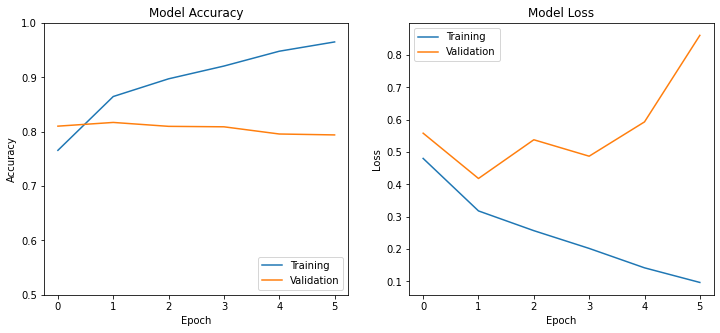

In [0]:
history = history_2


# BETTER LOOKING PLOTS FOR ACCURACY AND LOSS

import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_ylim([0.5,1])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='upper left')


In [0]:
# LOAD THE BEST PERFORMING MODEL (SO FAR.)
best_model = keras.models.load_model('imdb_lstm_best.h5')

best_model.evaluate(testing_padded, testing_labels_final)

782/782 [==============================] - 7s 9ms/step - loss: 0.4186 - accuracy: 0.8171


[0.4185641407966614, 0.817080020904541]

##### QUICK SUMMARY
The first tactic yielded a performance improvement of ~2%. The accuracy stands at 82%

I'll be attempting the following TWO approaces to try and incease the accuracy ( Target = 85% )

1. *Using Sequence Models (LSTMs/GRUs)* **Got an accuracy boost of ~2%**
2. Using Pre-Trained Embeddings (GloVe - Global Vectors for Word Representation)
3. Using Text Preprocessing Techniques (e.g. Lemmatization, Stop Words etc)

Over to attempting **Pre Trained Embeddings**

<BR>

## LSTM with Pre-Trained Embeddings

Using the GloVe 100 dimensional matrix

In [0]:
# GETTING THE EMBEDDING FILE
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt

--2020-04-12 10:15:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  96.6MB/s    in 3.4s    

2020-04-12 10:15:27 (96.6 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [0]:
print("Length of word_index : ",len(word_index))

Length of word_index :  86539


In [0]:

# SET EMBEDDING DIMENSIONS TO 100 (CORRESPONDING TO GLOVE)
embedding_dim = 100
vocab_size = len(word_index) 

# USING THE EMBEDDING FILE TO BUILD THE EMBDEDDING MATRIX

embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size + 1, embedding_dim));

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [0]:
print("Vocab Size: ", vocab_size)

Vocab Size:  86539


In [0]:
# CLEAR BACKEND DATA

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


# CREATE A DENSE NEURAL NETWORK IN KERAS

#vocab_size = vocab_index + 1   # NUMBER OF UNIQUE WORDS IN VOCAB = 10,000 + 1 
#embedding_dimensions = 16
sentence_length = max_length  # LENGTH OF EACH PADDED SENTENCE = 120


lstm_model_exp = keras.models.Sequential([
                                          
                  keras.layers.Embedding(input_dim = vocab_size + 1,
                                         output_dim = embedding_dim,
                                         input_length = sentence_length,
                                         weights = [embeddings_matrix],
                                         trainable = False
                                         ),
                          
                  keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences= True)),
                  keras.layers.LayerNormalization(),

                  keras.layers.Bidirectional(keras.layers.LSTM(64)),
                  keras.layers.LayerNormalization(),

                  keras.layers.Dense(64, activation = "elu"),
                  keras.layers.Dropout(rate = 0.1),
                  keras.layers.BatchNormalization(),
                  
                  keras.layers.Dense(32, activation = "elu"),
                  keras.layers.Dropout(rate = 0.1),
                  keras.layers.BatchNormalization(),

                  keras.layers.Dense(1, activation = "sigmoid")
                  
])


# VIEW MODEL ARCHITECTURE
lstm_model_exp.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 100)          8654000   
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          84480     
_________________________________________________________________
layer_normalization (LayerNo (None, 120, 128)          256       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
layer_normalization_1 (Layer (None, 128)               256       
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [0]:
print("\n Shape of training data", training_padded.shape)
print("\n Shape of training labels", training_labels_final.shape)



 Shape of training data (25000, 120)

 Shape of training labels (25000,)


In [0]:
# IMPLEMENT CALLBACKS

checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_lstm__exp_best.h5",save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)




# COMPILE AND FIT MODEL

lstm_model_exp.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

history_3 = lstm_model_exp.fit(training_padded, training_labels_final, epochs = 20,
                          validation_data = (testing_padded, testing_labels_final), 
                           callbacks = [checkpoint_cb, early_stopping_cb]
                           )


Epoch 1/20
782/782 [==============================] - 27s 35ms/step - loss: 0.6588 - accuracy: 0.6270 - val_loss: 0.5240 - val_accuracy: 0.7444
Epoch 2/20
782/782 [==============================] - 26s 33ms/step - loss: 0.4742 - accuracy: 0.7754 - val_loss: 0.4383 - val_accuracy: 0.7950
Epoch 3/20
782/782 [==============================] - 26s 33ms/step - loss: 0.4354 - accuracy: 0.8008 - val_loss: 0.4277 - val_accuracy: 0.8026
Epoch 4/20
782/782 [==============================] - 26s 33ms/step - loss: 0.4151 - accuracy: 0.8091 - val_loss: 0.4425 - val_accuracy: 0.7935
Epoch 5/20
782/782 [==============================] - 26s 33ms/step - loss: 0.3947 - accuracy: 0.8235 - val_loss: 0.3956 - val_accuracy: 0.8146
Epoch 6/20
782/782 [==============================] - 25s 33ms/step - loss: 0.3719 - accuracy: 0.8348 - val_loss: 0.3963 - val_accuracy: 0.8182
Epoch 7/20
782/782 [==============================] - 26s 33ms/step - loss: 0.3542 - accuracy: 0.8439 - val_loss: 0.3839 - val_accuracy:

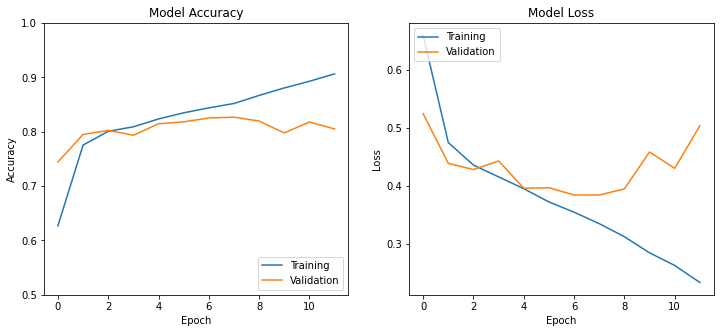

In [0]:
history = history_3


# BETTER LOOKING PLOTS FOR ACCURACY AND LOSS

import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_ylim([0.5,1])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='upper left')


In [0]:
# LOAD THE BEST PERFORMING MODEL (SO FAR.)
best_model = keras.models.load_model('imdb_lstm__exp_best.h5')

best_model.evaluate(testing_padded, testing_labels_final)

782/782 [==============================] - 8s 10ms/step - loss: 0.3838 - accuracy: 0.8268


[0.38382962346076965, 0.8267999887466431]

##### QUICK SUMMARY
The second tactic yielded a performance improvement of ~1%. The accuracy stands at 83%

I'll be attempting the 3rd approach to try and incease the accuracy ( Target = 85% )

1. *Using Sequence Models (LSTMs/GRUs)* **Got an accuracy boost of ~2%**
2. *Using Pre-Trained Embeddings (GloVe - Global Vectors for Word Representation)* **Got an accuracy boost of ~1%**
3. Using Text Preprocessing Techniques (e.g. Lemmatization, Stop Words etc)


Over to attempting **Text Preprocessing Techniques**

<BR>


# Final Model with `Text Preprocessing` & `Pre-Trained Embeddings` (`LSTM` Based)

The target accuracy is 85%.

I'll be building this model ***from scratch***